In [1]:
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pdb
from Patch_ana import patch_pip
import seaborn as sns

% matplotlib inline
%load_ext autoreload
% autoreload

In [2]:
data= pd.read_csv('/data/Good data storage.csv')
data.head()

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
0,2016072704,27,3,0,0,0,1,"26,27,28,29","31,32,33,34,35",1,0,NaN,50Hz IE preonly
1,2017021501,30,3,0,0,0,2,"12,13","16,17",1,0,NaN,50Hz IE preonly
2,2016091403,30,2,0,0,0,1,"14,15","17,18",1,1,NaN,50Hz IE preonly
3,2017062202,24,1,0,0,0,1,"30,31,32","34,35",1,0,"No change, good data",50Hz IE preonly
4,2016072902,29,1,0,1,0,0,43,"45,46,47,48,49",1,0,NaN,50Hz IE preonly


In [3]:
cd /data

/data


In [4]:
data['Ptl_note'].value_counts()

50Hz EI preonly          12
50Hz EI high freq        12
E_I_2Hz_associative      12
E_I_2Hz_Associ_AM251     11
EI_low high              10
50Hz EI postonly         10
EI_antihebbian           10
50Hz IE postonly          9
50Hz IE preonly           9
50Hz IE high freq         8
E_I_2Hz_POST_AM251        7
E_I_preonly_low           7
No ptl                    7
E_I_50Hz_Associ_AM251     6
 Naspm 100 uM             5
EI_high_low               5
50Hz II high freq         5
E_i_postsynapti_low       4
IE_high_low               4
IE_high low               4
E_I_postsynapti_low       2
Naspm 100 uM              2
50 hZ II preonly          1
50 Hz II preonly          1
-67.5                     1
pre only after Naspm      1
Name: Ptl_note, dtype: int64

In [8]:
data_post_2Hz_reci = data[(data['Ptl_note']=='E_i_postsynapti_low')]
data_post_2Hz_uni = data[(data['Ptl_note']=='E_i_postsynapti_low')&(data['Reci']==0)]

In [9]:
data_post_2Hz_reci

,File name,Age,Pip number,E-I,Reci,Artifact,IS100,Trial number before,Trial number after,Protocol,Elimi,Notes,Ptl_note
123,2017082304,22,1,1,1,0,1,"12,13","15,16",16,0,Ltd,E_i_postsynapti_low
124,2017082402,23,2,1,1,0,1,"26, 27","29, 30, 31, 32",16,0,Ltd,E_i_postsynapti_low
125,2017083001,29,2,1,1,0,1,6,"8,9,10",16,0,ltd,E_i_postsynapti_low
126,2017083101,30,2,1,1,0,1,"64,65","69,70,71,72",16,0,ltd,E_i_postsynapti_low


In [8]:
# # # Process all the before trial
# # isi=1   # Use only the 100 ms
# # trial_output = {}

# # data_tmp = data_post_2Hz_reci
# for j in range(len(data_pre_2Hz_reci)):
#     test_name = str(int(data_tmp['File name'].iloc[j]))
#     if len(test_name)==12:
#         test_name = test_name[:-2]
#     test_name = 'test'+ test_name
#     test_data = sio.loadmat(test_name)
#     test_pip = data_tmp.iloc[j]['Pip number']
#     test_trace_idx_bef = data_tmp.iloc[j]['Trial number before']
#     test_trace_idx_aft = data_tmp.iloc[j]['Trial number after']
#     ifartifact = data_tmp.iloc[j]['Artifact']
#     isi = data_tmp.iloc[j]['IS100']
#     bef_index = [int(s)-1 for s in str.split(test_trace_idx_bef, ',')]
#     aft_index = [int(s)-1 for s in str.split(test_trace_idx_aft, ',')]
#     trial_output[data_tmp['File name'].iloc[j].astype(str)]= patch_pip.bef_aft_ana(trial=test_data['test'][0], bef_index=bef_index, aft_index=aft_index, test_pip=test_pip, isi=isi, ifartifact=ifartifact, ave_len=3,  iffigure=0)

# # post_2Hz_reci = pd.DataFrame(trial_output, index=['Before', 'After']).transpose()
# # post_2Hz_reci.to_pickle('post_2Hz_reci')

In [9]:
post_2Hz_reci = pd.read_pickle('post_2Hz_reci')

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


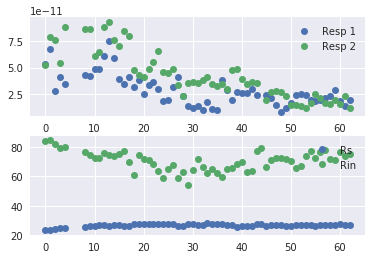

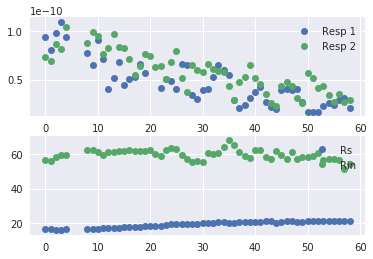

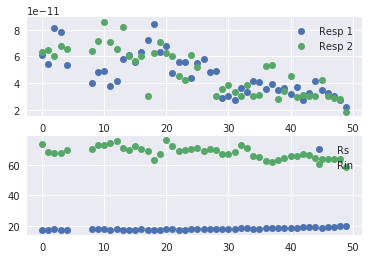

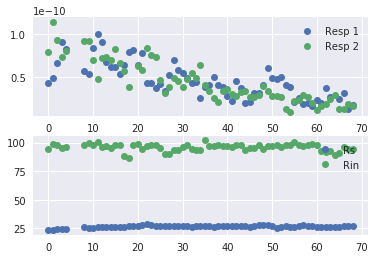

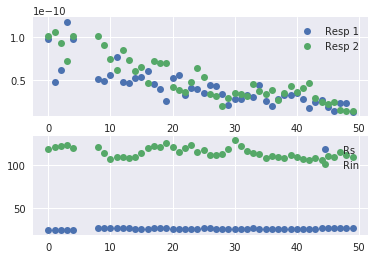

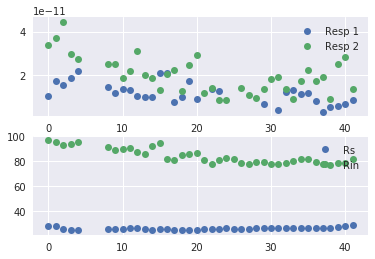

In [10]:
data_ana = post_2Hz_reci
ave_ptl_resp = np.zeros((len(post_2Hz_reci), 60))

for i in range(len(post_2Hz_reci)):
    bef_amp1 = data_ana.iloc[i]['Before']['ave_amp1'][-5:]
    aft_amp1 = data_ana.iloc[i]['After']['ave_amp1']
    bef_amp2 = data_ana.iloc[i]['Before']['ave_amp2'][-5:]
    aft_amp2 = data_ana.iloc[i]['After']['ave_amp2']
    bef_rs = data_ana.iloc[i]['Before']['rs'][-5:]
    aft_rs = data_ana.iloc[i]['After']['rs']
    bef_ir = data_ana.iloc[i]['Before']['ir'][-5:]
    aft_ir = data_ana.iloc[i]['After']['ir']
    rs_joint= np.concatenate([bef_rs, np.ones((3,1))*np.nan, aft_rs])
    ir_joint= np.concatenate([bef_ir, np.ones((3,1))*np.nan, aft_ir])
    resp1_joint= np.concatenate([bef_amp1, np.ones((3,1))*np.nan, aft_amp1])
    resp2_joint = np.concatenate([bef_amp2, np.ones((3,1))*np.nan, aft_amp2])
    ave_ptl_resp[i,:5] = bef_amp1[-5:].reshape(1,-1)
    end_trace = np.min((48, len(aft_amp1)))
    ave_ptl_resp[i,12:12+end_trace] = aft_amp1[:end_trace].reshape(1,-1)
    plt.figure()
    fig, ax = plt.subplots(2,1)
    ax[0].plot(resp1_joint, 'o', label='Resp 1')
    ax[0].plot(resp2_joint, 'o', label='Resp 2')
    ax[0].legend(loc='upper right')
    ax[1].plot(rs_joint, 'o', label='Rs')
    ax[1].plot(ir_joint, 'o', label='Rin')
    ax[1].legend(loc='upper right')
    
ave_ptl_mean = np.nanmean(ave_ptl_resp, axis=0)
ave_ptl_ste = np.nanstd(ave_ptl_resp, axis=0)/np.sqrt(i)

<Container object of 3 artists>

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


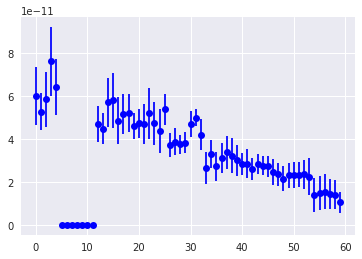

In [11]:
plt.errorbar(x=np.arange(len(ave_ptl_mean)), y=ave_ptl_mean, yerr=ave_ptl_ste, fmt='bo')

In [17]:
elimi = np.array([60,55,45,60, 45,40])
# elimi_sr = pd.Series(elimi, index=post_2Hz_reci.index)
# post_2Hz_reci['elimi']=elimi_sr
# post_2Hz_reci.to_pickle('post_2Hz_reci')

Obtain the change of PPR before and after the pairing

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


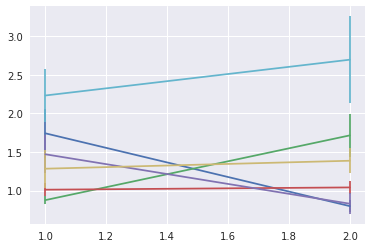

In [92]:
for i in range(len(post_2Hz_reci)):
    bef_PPR_mean = np.nanmean(post_2Hz_reci.iloc[i]['Before']['PPR'][-5:])
    bef_PPR_std = np.nanstd(post_2Hz_reci.iloc[i]['Before']['PPR'][-5:])/np.sqrt(5)
    post_end = post_2Hz_reci.iloc[i]['elimi'] - 8
    aft_PPR_mean = np.nanmean(post_2Hz_reci.iloc[i]['After']['PPR'][post_end-10:post_end])
    aft_PPR_std = np.nanstd(post_2Hz_reci.iloc[i]['After']['PPR'][post_end-10:post_end])/np.sqrt(10)
    plt.errorbar(x = [1,2], y=[bef_PPR_mean, aft_PPR_mean], yerr=[bef_PPR_std, aft_PPR_std])

/usr/local/lib/python3.5/dist-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


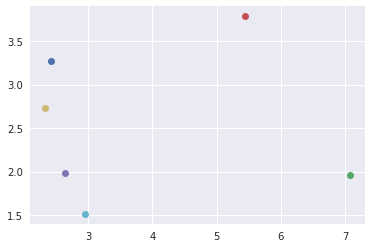

In [106]:
for i in range(len(post_2Hz_reci)):
    bef_PPR_mean = np.nanmean(post_2Hz_reci.iloc[i]['Before']['PPR'][-5:])
    bef_PPR_std = np.nanstd(post_2Hz_reci.iloc[i]['Before']['PPR'][-5:])
    bef_PPR_cv = 1 / np.square(bef_PPR_mean / bef_PPR_std)
    post_end = post_2Hz_reci.iloc[i]['elimi'] - 8
    aft_PPR_mean = np.nanmean(post_2Hz_reci.iloc[i]['After']['PPR'][post_end-10:post_end])
    aft_PPR_std = np.nanstd(post_2Hz_reci.iloc[i]['After']['PPR'][post_end-10:post_end])
    aft_PPR_cv = 1 / np.square(aft_PPR_mean / aft_PPR_std)
    norm_1_cv2 = 
    plt.plot(bef_PPR_cv, aft_PPR_cv, 'o')
    plt.plot()
    


In [98]:
bef_PPR_cv

2.9590618028225015